In [ ]:
import pandas as pd      # Import pandas for data manipulation
import numpy as np       # Import numpy for numerical operations
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import seaborn as sns    # Import seaborn for statistical plots
# from scipy import stats # (Optional) Import scipy for advanced stats

# Read and clean data
df = pd.read_csv("assignment_3_dataset.csv")  # Load dataset from CSV file
df = df.drop_duplicates()  # Remove duplicate rows from the dataframe

# Standardize language names (convert to title case)
df['lang'] = df['lang'].str.title()  # Convert all language names to title case

# Convert numeric columns to proper types
for col in ['z1000t','z0t','z1000mem','stmtL','z1000rel','m1000rel','whours']:  # For each numeric column
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, set errors to NaN

# Print unique language names to verify cleaning
print("Unique languages after cleaning:")  # Print header for language check
print(df['lang'].unique())  # Print array of unique language names

Summary statistics:

Log-transformed scaling ratio by language:
        count      mean       std       min       25%       50%       75%  \
lang                                                                        
C         3.0  0.781370  0.152806  0.693147  0.693147  0.693147  0.825481   
C++      10.0  2.609763  2.227372  0.693147  0.693147  1.620110  3.990166   
Java     23.0  2.428899  2.059762  0.737513  0.824743  1.376805  3.844708   
Perl     12.0  1.480098  1.534582  0.718352  0.759997  0.850494  0.962998   
Python   12.0  1.236977  1.186016  0.739939  0.804526  0.853590  1.031089   
Rexx      3.0  2.609870  1.127850  1.314619  2.227340  3.140060  3.257495   
Tcl       9.0  1.633879  1.719894  0.749018  0.790540  0.837018  0.984570   

             max  
lang              
C       0.957815  
C++     6.476180  
Java    6.610696  
Perl    5.420535  
Python  4.980863  
Rexx    3.374929  
Tcl     5.772622  


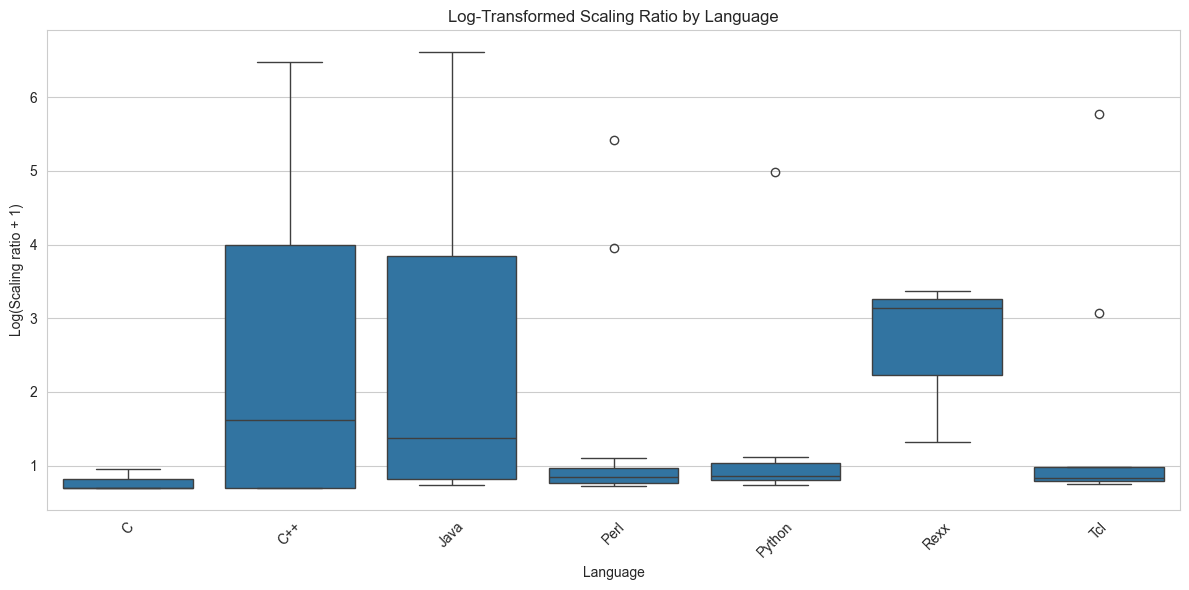

In [ ]:
# Graph 3: Check scalability / efficiency growth
sns.set_style('whitegrid')  # Set seaborn plot style to whitegrid

# Remove rows where z1000t or z0t is empty/NaN and create a copy
df_clean = df.dropna(subset=['z1000t', 'z0t']).copy()  # Drop rows with missing z1000t or z0t

# Compute scaling ratio, avoiding the SettingWithCopyWarning
df_clean.loc[:, 'scaling_ratio'] = df_clean['z1000t'] / df_clean['z0t'].replace(0, np.nan)  # Calculate scaling ratio, avoid division by zero
df_clean.loc[df_clean['scaling_ratio'].isin([np.inf, -np.inf]), 'scaling_ratio'] = np.nan  # Replace infinite ratios with NaN

# Apply log transformation to handle large ratios (adding small constant to handle zeros)
df_clean.loc[:, 'scaling_ratio_log'] = np.log1p(df_clean['scaling_ratio'])  # Log-transform scaling ratio

# Create single plot with log-transformed data
plt.figure(figsize=(12,6))  # Set figure size
sns.boxplot(data=df_clean, x='lang', y='scaling_ratio_log')  # Boxplot of log scaling ratio by language
plt.title('Log-Transformed Scaling Ratio by Language')  # Set plot title
plt.xlabel('Language')  # X-axis label
plt.ylabel('Log(Scaling ratio + 1)')  # Y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to fit everything

# Print summary statistics
print("Summary statistics:")  # Print header for summary stats
print("\nLog-transformed scaling ratio by language:")  # Print sub-header
print(df_clean.groupby('lang')['scaling_ratio_log'].describe())  # Print stats by language

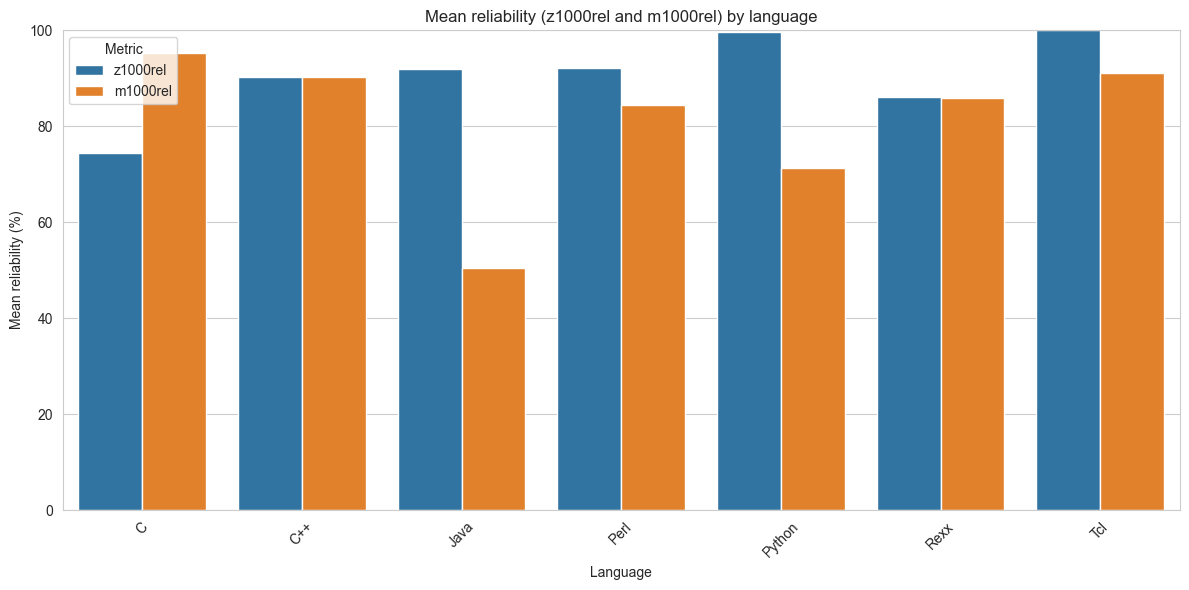

In [ ]:
# Graph 5: Compare reliability across problem types
# Grouped barplot showing mean z1000rel and m1000rel per language
# Ensure numeric conversion already done in previous cell
df_rel = df.groupby('lang')[['z1000rel','m1000rel']].mean().reset_index()  # Group by language and calculate mean reliability
df_melt = df_rel.melt(id_vars='lang', value_vars=['z1000rel','m1000rel'],  # Convert wide table to long format
                      var_name='metric', value_name='mean_reliability')
plt.figure(figsize=(12,6))  # Set figure size
sns.barplot(data=df_melt, x='lang', y='mean_reliability', hue='metric')  # Barplot of mean reliability by language and metric
plt.title('Mean reliability (z1000rel and m1000rel) by language')  # Set plot title
plt.ylim(0, 100)  # Set y-axis limits
plt.xlabel('Language')  # X-axis label
plt.ylabel('Mean reliability (%)')  # Y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title='Metric')  # Add legend with title
plt.tight_layout()  # Adjust layout to fit everything

Data points before filtering: 73


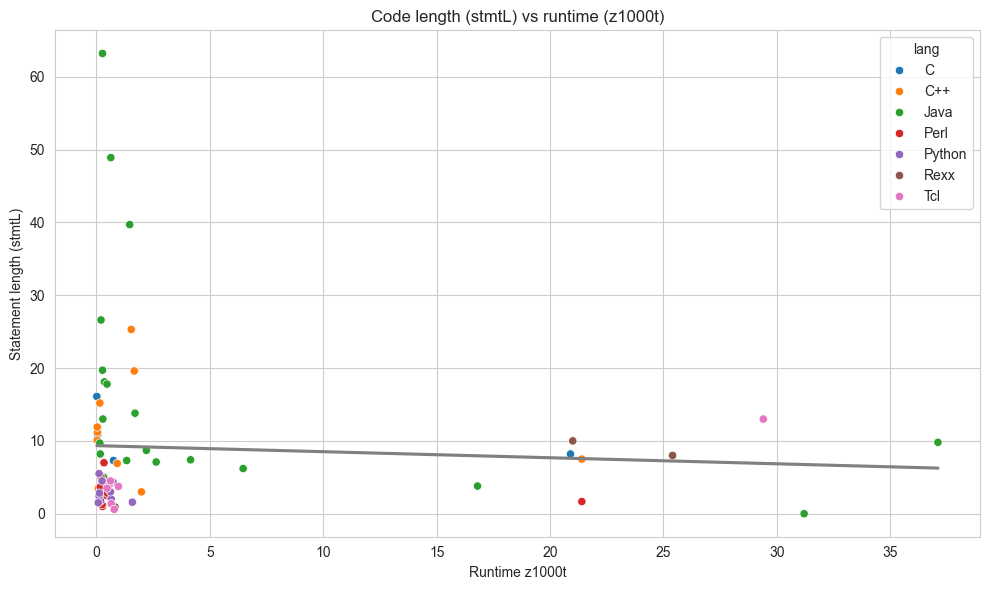

In [ ]:
# Graph 6: Relation between code size (stmtL) and runtime (z1000t)

df_G6 = df.dropna(subset=['stmtL', 'z1000t']).copy()  # Drop rows with missing stmtL or z1000t
print(f"Data points for Graph 6: {len(df_G6)}")  # Print number of data points used
plt.figure(figsize=(10,6))  # Set figure size
sns.scatterplot(data=df_G6, x='stmtL', y='z1000t', hue='lang', alpha=0.7)  # Scatterplot of code length vs runtime, colored by language
# Use standard regression instead of lowess
sns.regplot(data=df_G6.dropna(subset=['stmtL','z1000t']),  # Regression line on cleaned data
            x='stmtL', y='z1000t',
            scatter=False,
            color='gray')
plt.title('Code length (stmtL) vs runtime (z1000t)')  # Set plot title
plt.xlabel('Statement length (stmtL)')  # X-axis label
plt.ylabel('Runtime z1000t')  # Y-axis label
plt.tight_layout()  # Adjust layout to fit everything

# print("Summary statistics:")
# print("\nLog-transformed scaling ratio by language:")
# print(df_G6.groupby('lang')['scaling_ratio_log'].describe())

Graph 8: using 73 rows (dropped 7 rows with missing/inf values)


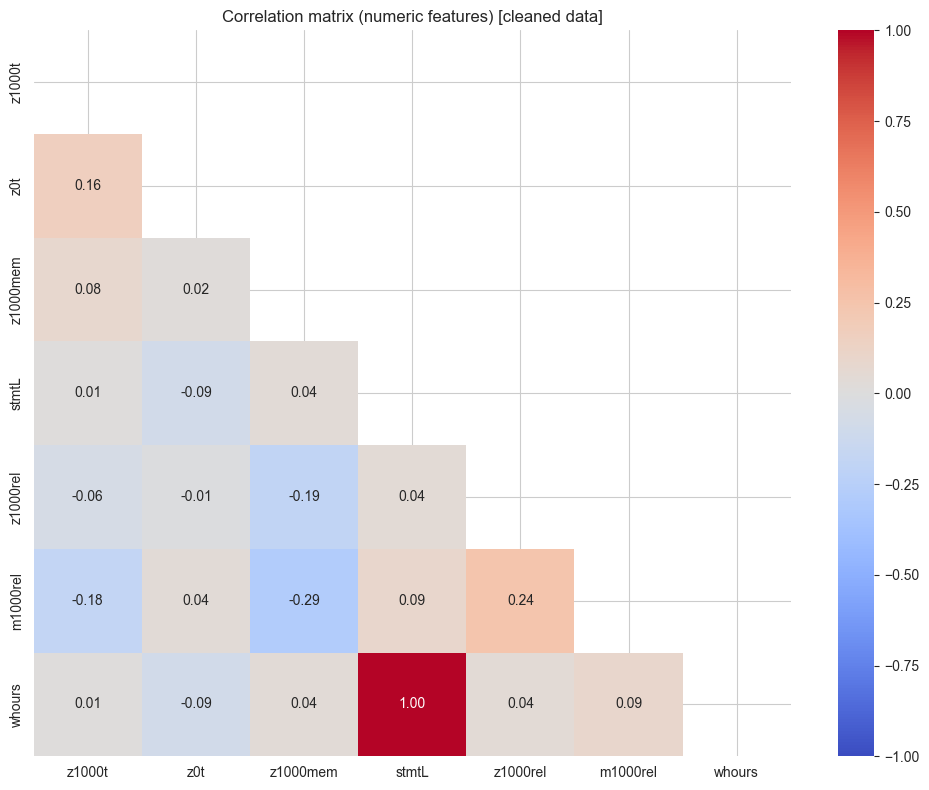

In [ ]:
# Graph 8: Correlation heatmap between numeric features (clean data first)
num_cols = ['z1000t','z0t','z1000mem','stmtL','z1000rel','m1000rel','whours']  # List of numeric columns to analyze
# Make a working copy and ensure numeric types
df_corr = df.copy()  # Copy the dataframe for cleaning
df_corr[num_cols] = df_corr[num_cols].apply(pd.to_numeric, errors='coerce')  # Coerce columns to numeric, set errors to NaN
before = len(df_corr)  # Store initial row count
# Drop rows with any NaN in the numeric columns
df_corr = df_corr.dropna(subset=num_cols).reset_index(drop=True)  # Drop rows with missing values in numeric columns
# Remove rows with infinite values (if any)
df_corr = df_corr.replace([np.inf, -np.inf], np.nan).dropna(subset=num_cols).reset_index(drop=True)  # Remove inf values
after = len(df_corr)  # Store cleaned row count
print(f"Graph 8: using {after} rows (dropped {before-after} rows with missing/inf values)")  # Print cleaning summary
if after == 0:
    print("No data available to compute correlations after cleaning.")  # Print message if no data remains
else:
    corr = df_corr[num_cols].corr()  # Compute correlation matrix
    plt.figure(figsize=(10,8))  # Set figure size
    mask = np.triu(np.ones_like(corr, dtype=bool))  # Mask upper triangle for heatmap
    sns.heatmap(corr, annot=True, fmt='.2f', mask=mask, cmap='coolwarm', vmin=-1, vmax=1)  # Plot heatmap
    plt.title('Correlation matrix (numeric features) [cleaned data]')  # Set plot title
    plt.tight_layout()  # Adjust layout
    plt.show()  # Show plot

Graph 11: using 77 rows (dropped 3 rows with missing/inf values)


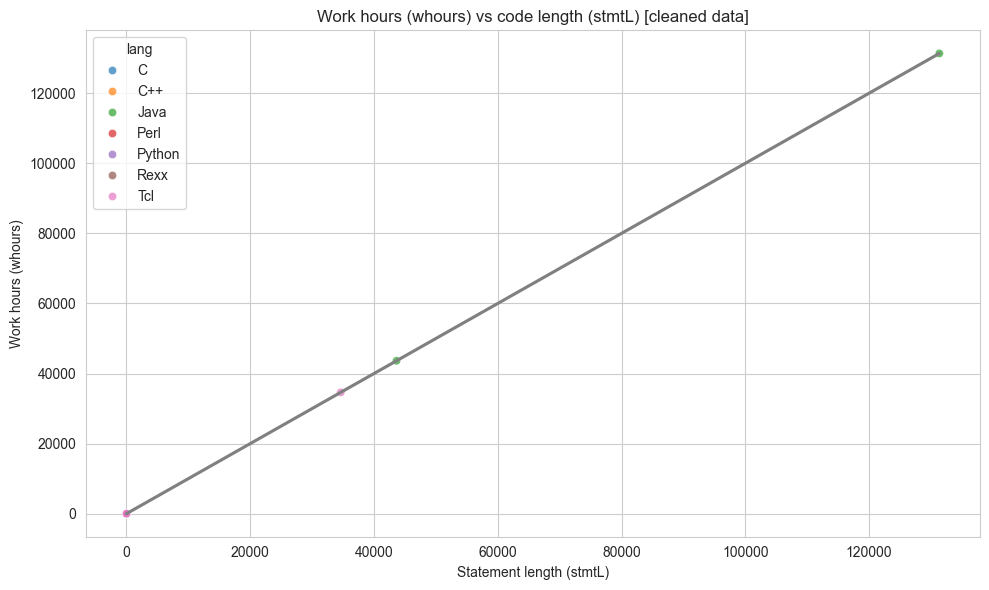

In [ ]:
# Graph 11: Check relation between work time (whours) and code length (stmtL) (clean data first)
num_cols = ['stmtL', 'whours']  # Columns to clean and analyze
# Working copy and ensure numeric types
df_g11 = df.copy()  # Copy the dataframe for cleaning
df_g11[num_cols] = df_g11[num_cols].apply(pd.to_numeric, errors='coerce')  # Coerce columns to numeric, set errors to NaN
before = len(df_g11)  # Store initial row count
# Drop rows with missing or non-numeric values in the key columns
df_g11 = df_g11.dropna(subset=num_cols).reset_index(drop=True)  # Drop rows with missing values
# Remove infinite values if present
df_g11 = df_g11.replace([np.inf, -np.inf], np.nan).dropna(subset=num_cols).reset_index(drop=True)  # Remove inf values
after = len(df_g11)  # Store cleaned row count
print(f"Graph 11: using {after} rows (dropped {before-after} rows with missing/inf values)")  # Print cleaning summary
if after == 0:
    print('No data available to plot work hours vs code length after cleaning.')  # Print message if no data remains
else:
    plt.figure(figsize=(10,6))  # Set figure size
    sns.scatterplot(data=df_g11, x='stmtL', y='whours', hue='lang', alpha=0.7)  # Scatterplot of code length vs work hours, colored by language
    # Regression line on cleaned data
    sns.regplot(data=df_g11.dropna(subset=['stmtL','whours']),  # Regression line on cleaned data
                x='stmtL', y='whours',
                scatter=False,
                color='gray')
    plt.title('Work hours (whours) vs code length (stmtL) [cleaned data]')  # Set plot title
    plt.xlabel('Statement length (stmtL)')  # X-axis label
    plt.ylabel('Work hours (whours)')  # Y-axis label
    plt.tight_layout()  # Adjust layout
    plt.show()  # Show plot